<a href="https://colab.research.google.com/github/ErikRSN/SNB/blob/main/SNB_FX_Analysis_Volume.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Foreign exchange transactions and interest rate derivatives



In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#Foreign exchange transactions and interest rate derivatives


# Load the dataset
file_path = '/content/snb-data-BIZ@SNB.DDUM.FXD-en-all-20221027_1456.csv' # Replace with the URL or path to your CSV file
df = pd.read_csv(file_path)



#Data Cleaning: Drop rows with missing 'Value'
#df_cleaned = df.dropna()

#df_cleaned.head


# Data Transformation: Aggregate data by year with mean values
#yearly_avg = df_cleaned.groupby('Date')['Value'].mean().reset_index()

#df = pd.read_csv(url, delimiter=';', skiprows=2)

# Data Transformation: Aggregate data by year with mean values
#yearly_avg = df_cleaned.groupby('Date')['Value'].mean().reset_index()

# Data Visualization: Line plot of average values over time
#plt.figure(figsize=(10, 6))
#sns.lineplot(x='Date', y='Value', data=yearly_avg)
#plt.title('Average Value Trend Over Years')
#plt.xlabel('Year')
#plt.ylabel('Average Value')
#plt.grid(True)
#plt.show()

In [19]:
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 1 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   CubeId;"BIZ@SNB.DDUM.FXD"  226 non-null    object
dtypes: object(1)
memory usage: 1.9+ KB


(                           CubeId;"BIZ@SNB.DDUM.FXD"
 0                  PublishingDate;"2022-10-27 14:56"
 1  Date;"COUNTERPARTYSECTOR";"COUNTERPARTYLOCATIO...
 2        1995;"T";"T";"T";"T";"ATD";"90873.78868419"
 3         1995;"T";"T";"T";"T";"TPM";"1635.72819632"
 4      1995;"FII";"T";"T";"T";"ATD";"76734.27502382",
 None)

In [20]:
# Splitting the data into separate columns based on the semicolon delimiter
df_split = df['CubeId;"BIZ@SNB.DDUM.FXD"'].str.split(';', expand=True)

# Extracting column names from the second row of the dataframe
column_names = df_split.iloc[1].str.strip('"').tolist()
df_split.columns = column_names

# Dropping the initial non-data rows
df_cleaned = df_split.drop([0, 1])

# Resetting the index of the dataframe
df_cleaned.reset_index(drop=True, inplace=True)

# Displaying the first few rows of the cleaned dataframe
df_cleaned.head()

,Date,COUNTERPARTYSECTOR,COUNTERPARTYLOCATION,WAEHRUNG1,WAEHRUNG2,SUMORAVERAGE,Value
0,1995,"""T""","""T""","""T""","""T""","""ATD""","""90873.78868419"""
1,1995,"""T""","""T""","""T""","""T""","""TPM""","""1635.72819632"""
2,1995,"""FII""","""T""","""T""","""T""","""ATD""","""76734.27502382"""
3,1995,"""FII""","""LOC""","""T""","""T""","""ATD""","""13186.65198523"""
4,1995,"""FII""","""CRO""","""T""","""T""","""ATD""","""63547.62303859"""


In [21]:
# Removing quotes and converting data types
df_cleaned = df_cleaned.apply(lambda x: x.str.strip('"'))

# Converting 'Date' to integer and 'Value' to float
df_cleaned['Date'] = pd.to_numeric(df_cleaned['Date'], errors='coerce')
df_cleaned['Value'] = pd.to_numeric(df_cleaned['Value'], errors='coerce')

# Checking for missing values and data types after conversion
missing_values_info = df_cleaned.isnull().sum()
data_types_info = df_cleaned.dtypes

missing_values_info, data_types_info

(Date                      0
 COUNTERPARTYSECTOR        0
 COUNTERPARTYLOCATION      0
 WAEHRUNG1                 0
 WAEHRUNG2                 0
 SUMORAVERAGE              0
 Value                   144
 dtype: int64,
 Date                      int64
 COUNTERPARTYSECTOR       object
 COUNTERPARTYLOCATION     object
 WAEHRUNG1                object
 WAEHRUNG2                object
 SUMORAVERAGE             object
 Value                   float64
 dtype: object)

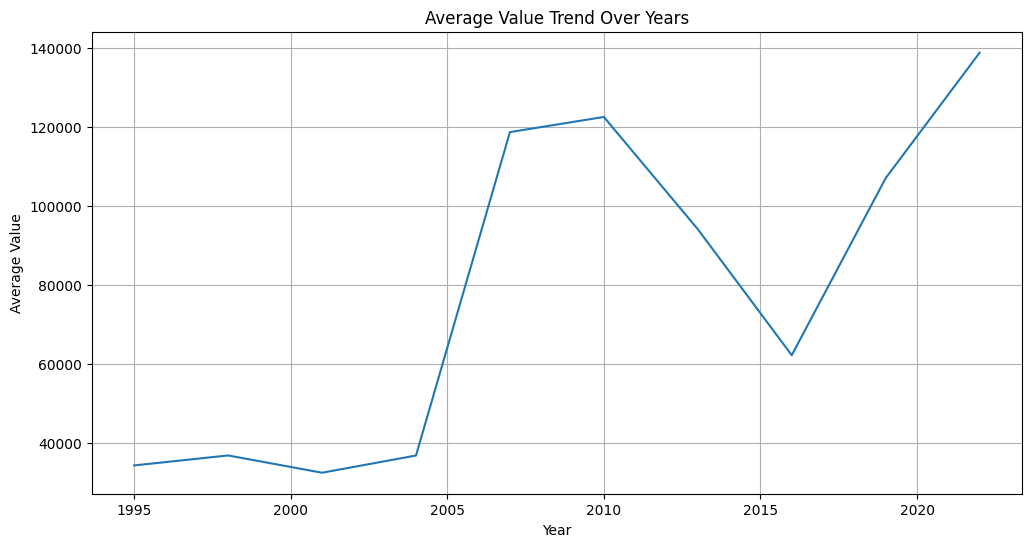

In [22]:
# Handling missing values by dropping rows where 'Value' is missing
df_cleaned = df_cleaned.dropna(subset=['Value'])

# Basic data cleaning is complete. Now, let's proceed to some basic visualizations.
# We will create a line plot to see the trend of 'Value' over the years.

import seaborn as sns
import matplotlib.pyplot as plt

# Aggregating the data by year and calculating the mean value for each year
yearly_avg = df_cleaned.groupby('Date')['Value'].mean().reset_index()

# Creating a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_avg, x='Date', y='Value')
plt.title('Average Value Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.grid(True)
plt.show()